## Problem Statement:
On the daily basis we get many emails and not all emails are genuine many of them are spam. If we can develop any technique which can tell us if this is an spam email, we can ignore or delete that automatically.<br>

In this notebook we will be checking data provided to us from kaggle which have email and their labels.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [3]:
rawDS = pd.read_csv('spam.csv')

In [4]:
print(rawDS.shape)
print('='*75)
print(rawDS.head())
print('='*75)
print(rawDS.info())
print('='*75)
print(rawDS.describe())
print('='*75)

(5572, 5)
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: o

In [5]:
rawDS.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
#we will have to rename the columns as well.
firstDS= rawDS.rename(columns = {'v1': 'SpamOrNot', 'v2': 'email'}, inplace = False)
firstDS=firstDS.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)

In [7]:
firstDS.head()

,SpamOrNot,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Note:** Till here we just cheked that the data is not null anywhere and we have deleted columns and all seems perfect.

ham     4825
spam     747
Name: SpamOrNot, dtype: int64


<AxesSubplot:>

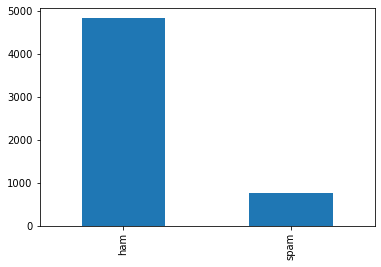

In [8]:
#We need to check if we have the balanced dataset or not, 
print(firstDS.SpamOrNot.value_counts())
firstDS.SpamOrNot.value_counts().plot(kind='bar')

**Note:** With this we can say that we have very less data to indentfy the spam. Can be said like unbalanced dataset

=================================
=================================

### EDA Starts

Think about any machine learning model they need the training data to be in numeric format. We need to think if we can convert this DS into numeric form. From the data we can say that whatever output feature is ham or spam is catagorized in to two columns name only. we can replace the ham and spam in 0 or 1's.

In [9]:
firstDS.SpamOrNot=firstDS['SpamOrNot'].replace(['ham'],'0')

In [10]:
firstDS.SpamOrNot=firstDS['SpamOrNot'].replace(['spam'],'1')

In [11]:
firstDS.head()

,SpamOrNot,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Moving Ahead:** Our output feature is all sorted. Now lets think about the email columns to convert the text data in to numeri format 

In [12]:
firstDS.email.apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: email, Length: 5572, dtype: int64

<AxesSubplot:>

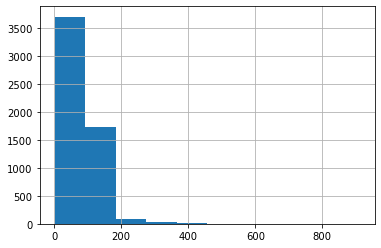

In [13]:
firstDS.email.apply(len).hist()

**Observation:** From the figure we can say that many of the data is under 200 length. So we can say we are talking about some 5000 X 200. Usually for NLP kind of model this is normal kind of data. So there should not be any problem.<br>

But since we know that we have unbalanced dataset. We need to check how much words we have for ham and spam.

<AxesSubplot:>

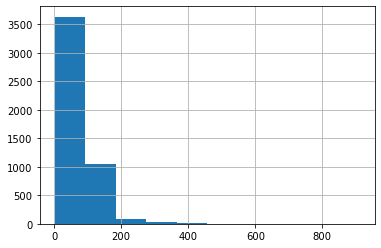

In [14]:
firstDS[firstDS['SpamOrNot']=='0'].email.apply(len).hist() 

<AxesSubplot:>

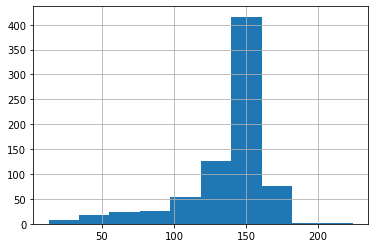

In [15]:
firstDS[firstDS['SpamOrNot']=='1'].email.apply(len).hist()

**Observation:** From the above graphs we can say that what we were thinking that we have less words for the spam email that is not true. So we know that the dataset is unbalanced but its not that bad because we have some ~150 words for 400 lines that is some 60K words. So we are good.

**Moving Ahead:** Now lets think about the how can we have numeric representation of the email content. There comes the "Bag of Words" concept. We will try to find out the each word occurence in the email. To do this sci-kit already provides the **CountVectorizer** concept.<br>
Before we go ahead and apply the CountVectorizer we need to understand the basis of CountVectorizer. If we go ahead usually we would need to remove all the punchuations and maybe converting all the data in to lower case becase "Move & move" are the same but the algoritms take it as 2 words. But we dont need to worry about that because CountVectorizer take care of all those work automatically.

In [16]:
#lets have the second dataset to avoid any rework and better understanding.
sds=firstDS

In [17]:
CountVector=CountVectorizer()

In [18]:
bagOfWords=CountVector.fit_transform(sds.email)

In [19]:
pd.DataFrame(bagOfWords.toarray(),columns=CountVector.get_feature_names()).head(10)

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell,žö
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Observation:** Till here we get to knew that how this bag of words works using CountVectorizer.

====================================
====================================

### Model Training

**Moving Ahead:** Now lets think about splitting the data because before we try to apply any ML algorithm the data must be splitted. So we will have out X data which is email and y data as SpamOrNot. Again whatever out X data is there that is just email right we need to apply the CountVetorizer in the same and then fir out ML model.

In [20]:
#lets splitt the data
X_train, X_test, y_train, y_test=train_test_split(sds['email'], sds['SpamOrNot'], test_size=0.2,random_state=1)

**Moving Ahead:** As I said we have the email train data and test data. We need to tokenzied them.

In [21]:
#We need to fir the X_train and transform as well because we need the matrix of bag of words.
X_train=CountVector.fit_transform(X_train)

In [22]:
#We dont need to fit the X_test but needed the transform for the matrix of bag of words.
X_test=CountVector.transform(X_test)

**Note:** Now this is your original train and test data<br>
Now we will get going and train our ML model.

In [23]:
naiveBayes = MultinomialNB()

In [24]:
naiveBayes.fit(X_train,y_train)

MultinomialNB()

In [25]:
pred=naiveBayes.predict(X_test)

In [26]:
#Accuracy of our model
accuracy_score(y_test,pred)

0.9847533632286996

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

CountVector=CountVectorizer()

#lets splitt the data
X_train, X_test, y_train, y_test=train_test_split(sds['email'], sds['SpamOrNot'], test_size=0.2,random_state=1)

#We need to fir the X_train and transform as well because we need the matrix of bag of words.
X_train=CountVector.fit_transform(X_train)

#We dont need to fit the X_test but needed the transform for the matrix of bag of words.
X_test=CountVector.transform(X_test)

In [ ]:
naiveBayes = MultinomialNB()

#Training the model
naiveBayes.fit(X_train,y_train)

#Lets see the prediction using X_test
pred=naiveBayes.predict(X_test)